In [1]:
from price_generator import generate_spread_path
import numpy as np
import matplotlib.pyplot as plt
from filter import Filter


 # Simulate Calendar Spreads
 Considering 2 scenarios:
 1. Rolling Futures
 2. Not Rolling Futures

In [2]:
x0, a, l, sig, k, dt = 1.5, 0.35, 0.05, 0.9, 0.25, 1 / 252.0
c1, c2, c3, c4 = 1.2, 0.19, 0.1, -0.34
q = 0.01
n_steps = 252
Tn = [400 / 360.0, 500.0 / 500 * 3]


In [3]:
price_path = generate_spread_path(
    x0,
    a,
    l,
    sig,
    k,
    dt,
    Tn,
    c1,
    c2,
    c3,
    c4,
    q,
    n_steps,
    rolling=False,
    seed=int(np.random.uniform(0, 10000)),
)
# # %% Plot
# plt.plot(price_path[0], label="Spot Price")
# plt.legend()
# plt.show()



In [4]:
our_filter = Filter(a, l, sig, q, k, c1, c2, c3, c4, dt)


pn1n1 = 0.1
results = []
xnn = np.zeros(len(price_path[0]) - 1)
vn = np.zeros(len(price_path[0]) - 1)
xnn[0] = price_path[0][0]

In [5]:
for i in range(1, (len(price_path[0]) - 1)):
    yn, T1, T2 ,T1_new,T2_new= (
        price_path[1][i],
        price_path[2][0, i],
        price_path[2][1, i],
        price_path[2][0, i+1],
        price_path[2][1, i+1],
    )
    xnn[i], pn1n1, vn[i - 1] = our_filter.one_step(
        yn, price_path[0][i], pn1n1, T1, T2,T1_new,T2_new
    )
    # xnn[i + 1], pn1n1 = our_filter.one_step(yn, xnn[i], pn1n1, T1, T2)
    results.append(pn1n1)

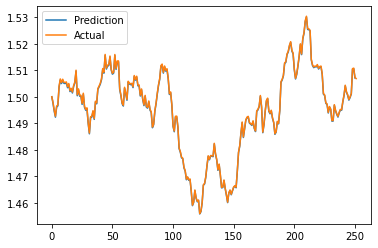

In [6]:
plt.plot(xnn, label="Prediction")
plt.plot(price_path[0], label="Actual")
plt.legend()

Mean: 0.02


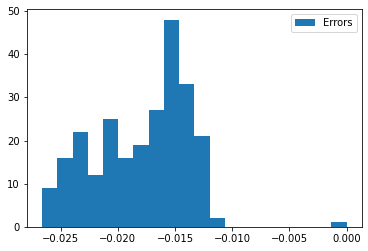

In [7]:
plt.hist((xnn / price_path[0][:-1] - 1) * 100, bins=20, label="Errors")
plt.legend()

print("Mean:", np.round(np.mean(abs(xnn / price_path[0][:-1] - 1) * 100), 2))


 # Test against previous day

Mean: 0.18


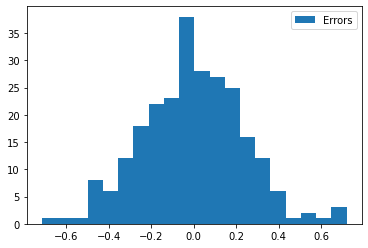

In [8]:
plt.hist(
    (price_path[0][:-1] / price_path[0][1:] - 1) * 100, bins=20, label="Errors"
)
plt.legend()

print(
    "Mean:",
    np.round(
        np.mean(abs(price_path[0][:-1] / price_path[0][1:] - 1) * 100), 2
    ),
)


 # Futures comparison

Mean: 2.59


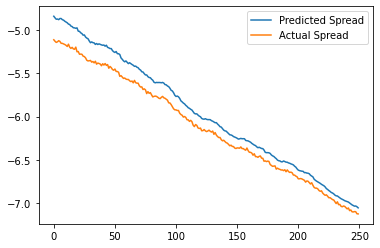

In [9]:
print(
    "Mean:",
    np.round(
        np.mean(abs(vn[:-1] / price_path[1][2:] - 1) * 100), 2
    ),
)

plt.plot(vn[:-1], label="Predicted Spread")
plt.plot(price_path[1][2:],label="Actual Spread")
plt.legend()


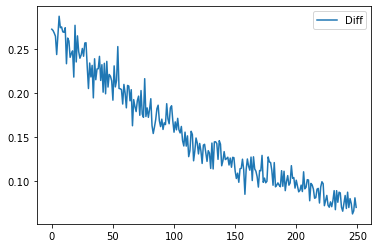

In [10]:
plt.plot(vn[:-1]-price_path[1][2:], label="Diff")
plt.legend()